In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("DelayedFlights.csv")
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


* Ejercicio

Resume gráficamente el Data Set, al menos que contenga

Una variable categórica (UniqueCarrier)

Una variable numérica (ArrDelay)

Una variable numérica y una categórica (ArrDelay y UniqueCarrier)

Dos variables numéricas (ArrDelay y DepDelay)
 
Tres variables (ArrDelay, DepDelay y UniqueCarrier)

Más de tres variables (ArrDelay, DepDelay, AirTime y UniqueCarrier).

In [3]:
df.columns # vamos a averiguar que columnas hay

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [125]:
# reutilizo los mismos nombres usados en el ejércicio 5 del sprint2,
#y sigo con el orden establécido el ejércicio anterior
df5 = df [[ 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 
           'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 
       'Cancelled', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]

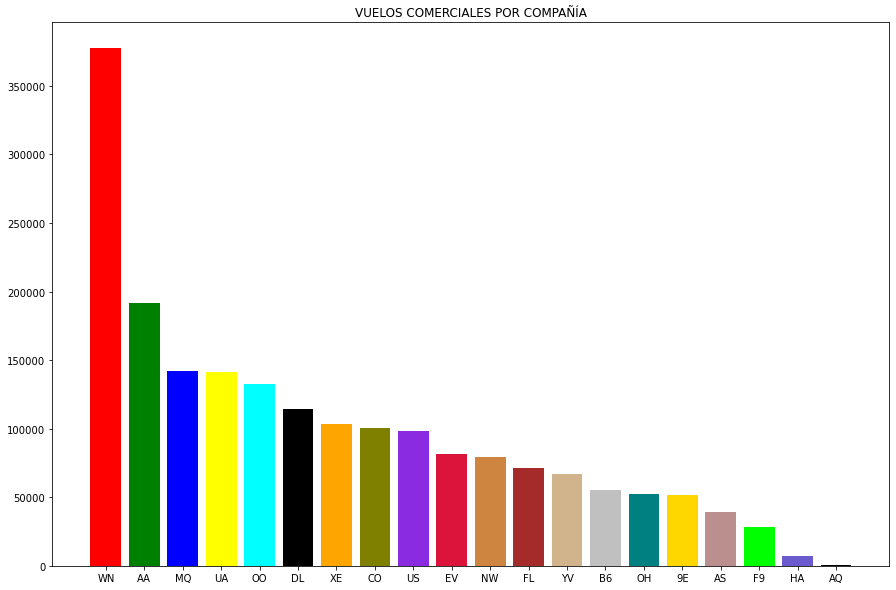

In [185]:
UC= df5["UniqueCarrier"].value_counts()# son los números de vuelos que hace cada compañía 
indexUC= UC.index # extraigo el índice y lo convierto en vector
indexUC= indexUC.to_numpy()
col= ["red", 'green', 'blue', 'yellow', 'cyan', "black","orange","olive", "blueviolet","crimson", "peru","brown",
     "tan", "silver","teal","gold", "rosybrown", "lime", "slateblue", "black"]# pongo una serie de colores sin ningún criterio

#hacemos un diagrama de barras
UC= UC.to_numpy() # también paso el DF a vector
plt.figure(figsize=(15,10))
plt.title("VUELOS COMERCIALES POR COMPAÑÍA")
plt.bar(indexUC, UC, color= col)
plt.savefig("fig1.png")
plt.show()






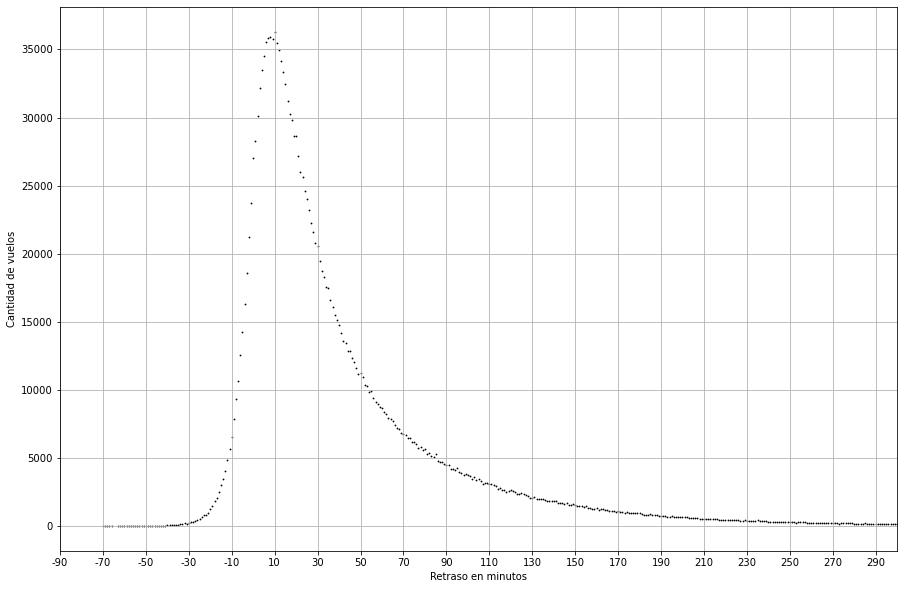

In [186]:
AD=df5['ArrDelay'][df5['ArrDelay'].isnull()!=True].value_counts() # extraemos un n-vector,de la columna de ArrDelay y a
# su vez excluímos los valores nulos
indexAD= AD.index # lo mismo que en el anterior, sacamos índice y lo convertimos en vector
AD=AD.to_numpy()
indexAD= indexAD.to_numpy()
plt.figure(figsize=(15,10))
plt.xlabel('Retraso en minutos')
plt.ylabel('Cantidad de vuelos')
# observando el gráfico, limitamos el eje X, ya que encima de los 1300-1400 minutos son casos aislados, y 
# por encima de 300 empieza a aparecer una constante con pendiente casi nula 
plt.xlim(-90,300)
corte = [x for x in range(-90,300,20)]
plt.xticks(corte, corte)
plt.scatter(indexAD,AD,color="black", marker= ".", s= 2.5)
plt.grid()
plt.savefig("fig2.png")
plt.show()



In [127]:
# extraemos del Data set, La UniqueCarrier y Arrdelay, eliminando los valores nulos de ArrDelay
df8 = df5 [["UniqueCarrier","ArrDelay"]][df5['ArrDelay'].isnull()!=True]# agrupamos por compañías,  y sumamos los tiempos
                                                                        # de retraso
comp_delay= df8.groupby('UniqueCarrier')['ArrDelay'].sum().sort_values()


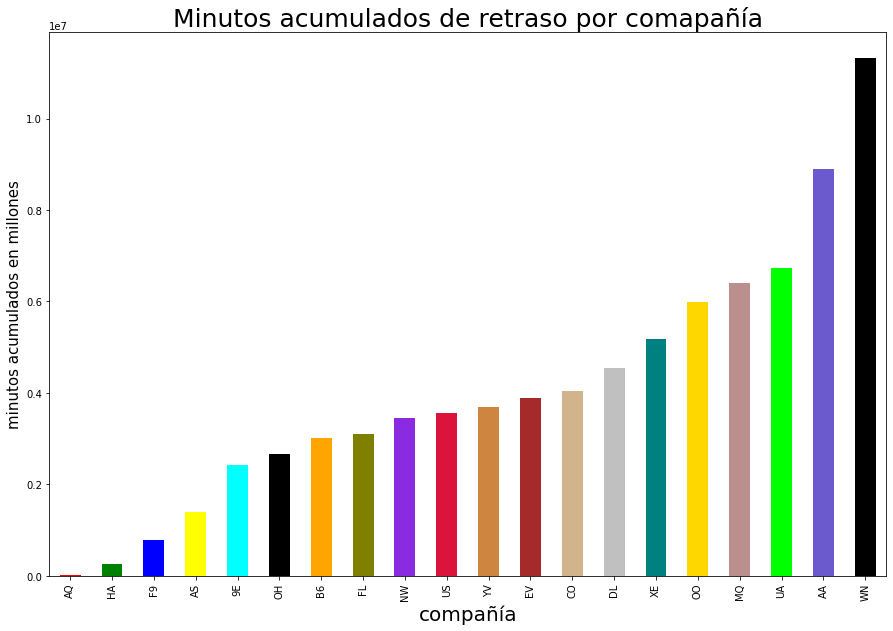

In [187]:
plt.figure(figsize=(15,10))
plt.title("Minutos acumulados de retraso por comapañía", size= 25)
comp_delay.plot( kind="bar" , color= col, )
plt.xlabel( "compañía", size= 20)
plt.ylabel( "minutos acumulados en millones", size= 15)
plt.savefig("fig3.png")



In [9]:
# sacamos las columnas del retraso de salida y retraso de llegada y las convertimos en vectores
df12 = df5 [["DepDelay","ArrDelay"]][df5['ArrDelay'].isnull()!=True]
x1= df12["DepDelay"]
x1= x1.to_numpy()
y1= df12["ArrDelay"]
y1= y1.to_numpy()
print ( np.max(x1), np.max(y1))
print ( np.min(x1), np.min(y1))# miramos sus límites para ver el alcance del eje

2467.0 2461.0
6.0 -109.0


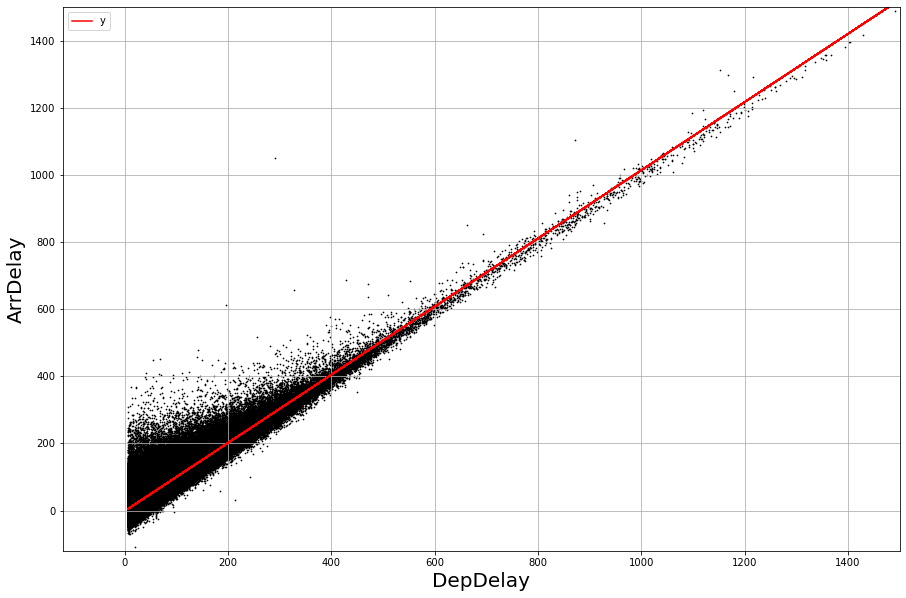

In [189]:
from scipy import stats# para hacer la regresión a través de scipy
plt.figure(figsize=(15,10))

plt.scatter(x1,y1, color = "black", s=0.5)# hacemos un gráfico de dispersión
plt.ylim(-120, 1500)# limitando el gráfico
plt.xlim(-120, 1500)
plt.xlabel("DepDelay", size = 20)
plt.ylabel("ArrDelay", size = 20)
plt.grid()

slope, intercept, r, p, std_err = stats.linregress(x1, y1)
#por otro lado, hacemos la regresión de la serie de puntos.
def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x1))

plt.plot(x1, mymodel, color = "r" )
plt.legend("y")
plt.savefig("fig4.png")




In [138]:
print ( "coeficiente de correlación es de : ", r)

coeficiente de correlación es de :  0.9529266852030124


----------------------------------------------------------------------------------------------------------------

In [79]:
df13 = df5 [["UniqueCarrier","DepDelay","ArrDelay"]][df5['ArrDelay'].isnull()!=True]# cogemos 3 columnas
comp_arrdelay= df13.groupby('UniqueCarrier')[["DepDelay","ArrDelay"]].sum()#agrupamos por compañías aéreas y sumamos 
#los todos lo minutos de retraso



,DepDelay,ArrDelay
UniqueCarrier,,
9E,2441828.0,2420468.0
AA,8857373.0,8889066.0
AQ,19362.0,15814.0
AS,1481435.0,1406735.0
B6,3017321.0,3025749.0
CO,4294574.0,4045932.0
DL,4436113.0,4535644.0
EV,3946204.0,3888131.0
F9,781023.0,788549.0


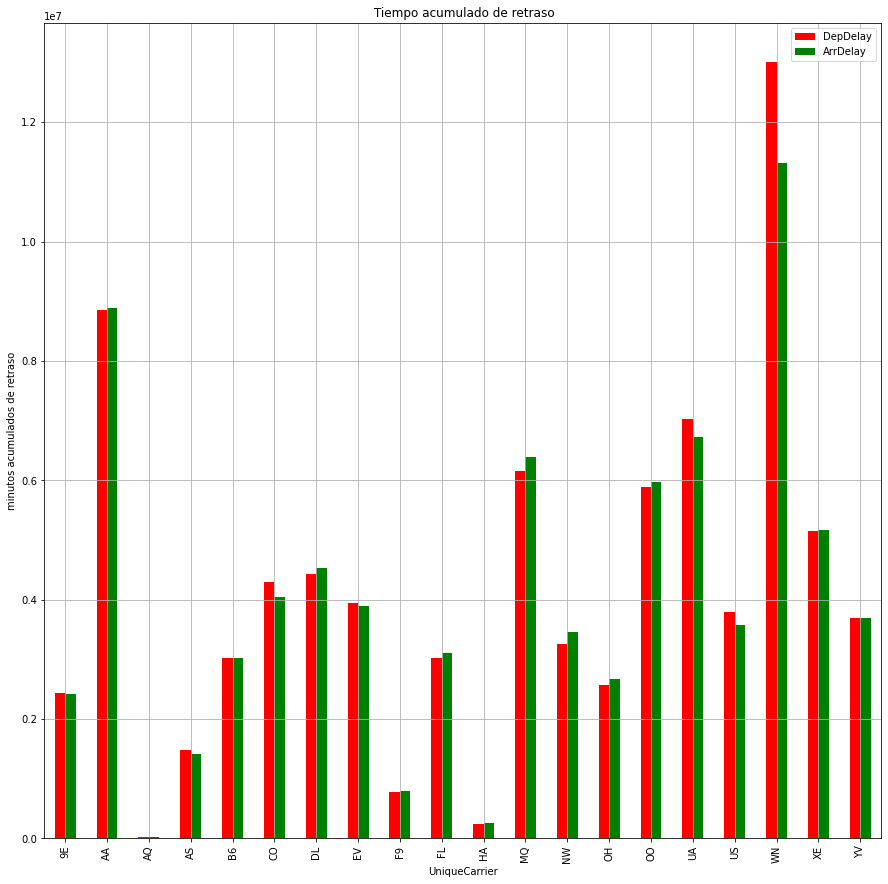

In [167]:
col2= ["red","green"]
comp_arrdelay.plot(kind= "bar", figsize= (15,15), color = col2, grid= "True", ylabel= 
                   ("minutos acumulados de retraso"), title= " Tiempo acumulado de retraso")

plt.savefig("fig5.png")


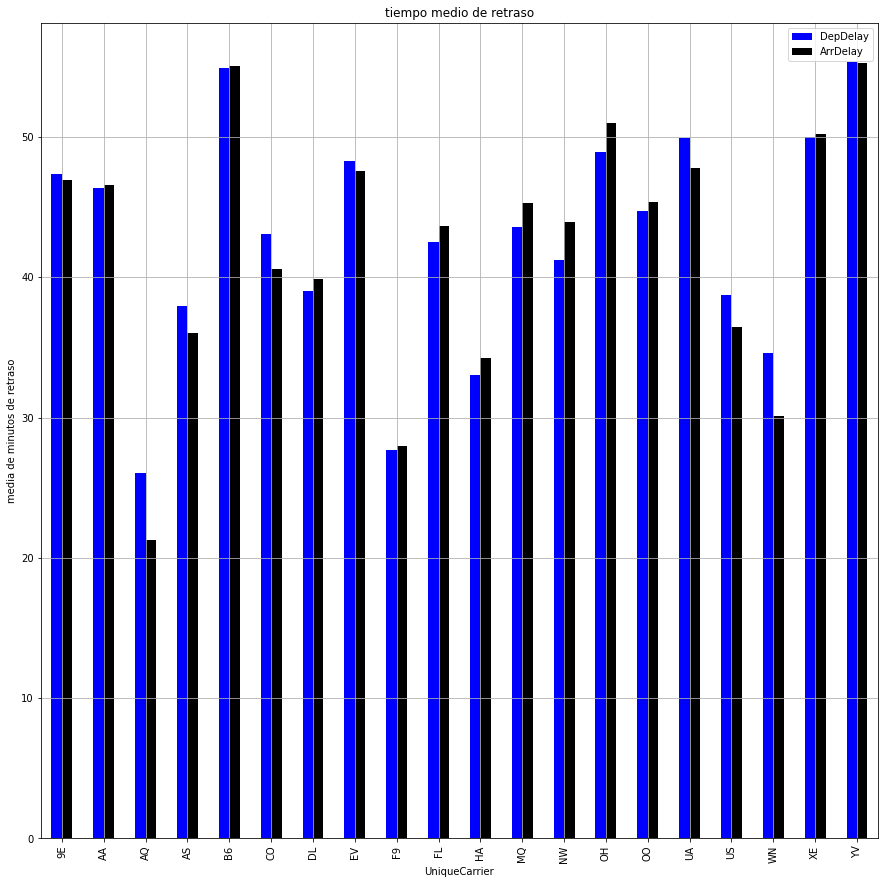

In [148]:
comp_arrdelay_mean= df13.groupby('UniqueCarrier')[["DepDelay","ArrDelay"]].mean()# en este caso hacemos lo mimso que antes
#pero en vez de sumar todos los minutos de retraso, hacemos la media
col2= ["blue","blacK"]
comp_arrdelay_mean.plot(kind= "bar", figsize= (15,15), color = col2, grid= "True", ylabel= "media de minutos de retraso",
                       title= "tiempo medio de retraso")
plt.savefig("fig6.png")

In [141]:
df15 = df5 [["UniqueCarrier","DepDelay","ArrDelay","AirTime"]][((df5['ArrDelay'].isnull()!=True)|(df5["AirTime"].isnull()!=True))]
mean= df15.groupby('UniqueCarrier')[["DepDelay","ArrDelay", "AirTime"]].mean()
#sacamos 4 columnas, agrupamos por compañía y sacamos la media por cada una de las tres variables en cada compañía


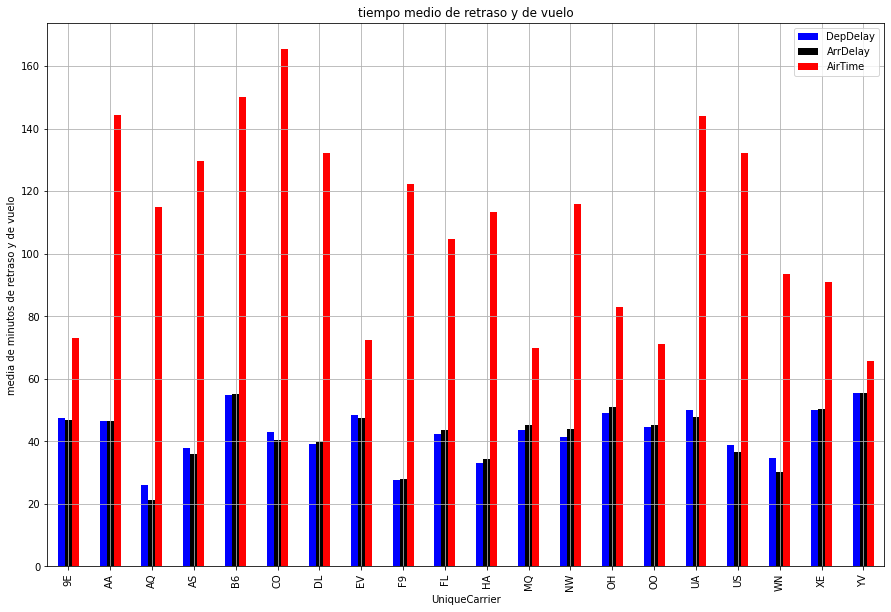

In [149]:
col3= ["blue","blacK", "red"]
mean.plot(kind= "bar", figsize= (15,10), color = col3, grid= "True", ylabel= "media de minutos de retraso y de vuelo",
                       title= "tiempo medio de retraso y de vuelo")
plt.savefig("fig7.png")